### <font color='blue'>  <h1><center>TP3: Hand Written Digits Classification </center></h1> </font> 

### Hand Written dataset is a collection of images for Hand Written Digits from 0 to 9 , we intend here to build a model to predict the value of the digit corresponding to the image. CNN must be the best approach here but we are going to go through some classic algorithms instead. The dataset is already available from sklearn library.

In [1]:
from sklearn import datasets, neighbors, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)


### <span style='background:yellow'>This is a scaling operation we are resizing the pixels value to be between 0 and 1  </span>


In [3]:
X_digits = X_digits / X_digits.max()


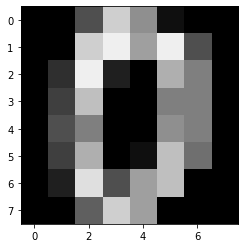

In [4]:
# Display the first image:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.fromarray((X_digits[0]*255).reshape(8,8))
imgplot = plt.imshow(img)
plt.show()

In [6]:
print('there are {} images in the dataset with  {} pixels each one '.format(X_digits.shape[0],X_digits.shape[1]))


there are 1797 images in the dataset with  64 pixels each one 


### <span style='background:pink'> Here we'll split the data with 10% for the test  </span>

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits, test_size = 0.1,random_state = 0)

### <span style='background:pink'> We need to test a bunch of algorithms on our dataset and for that  we'll define a pipeline and each time we tune some hyper parameters for each algorithm to see which is the best model  </span>

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb


In [9]:
# K-fold cross-validation and GridSearchCV
pipelines = []
params = []
names = []

#
# add Gausian naive bayes
pipelines.append(Pipeline([('clf', GaussianNB())])) ### Gausian naive bayes
params.append({'clf__priors':[None],'clf__var_smoothing':[0.0000001,0.00000001,0.000000001]})
names.append('GausianNB') 
## add SVM
pipelines.append(Pipeline([('clf', SVC())])) ### support vector machine
params.append({'clf__C':[0.01,0.1,1,10],'clf__kernel':['rbf','poly']})
names.append('SVM')   
## add LogisticRegression
pipelines.append(Pipeline([('clf', LogisticRegression())])) ### LogisticRegression
params.append({'clf__penalty':['l1','l2','elasticnet'],'clf__solver':['newton-cg','lbfgs','liblinear','sag','saga']})
names.append('LogisticRegression')    
## add KNeighborsClassifier
pipelines.append(Pipeline([('clf', KNeighborsClassifier())])) ### KNeighborsClassifier
params.append({'clf__n_neighbors':np.arange(5,10),'clf__n_jobs':[-1]})
names.append('KNeighborsClassifier') 
## add DecisionTreeClassifier
pipelines.append(Pipeline([('clf', DecisionTreeClassifier())])) ### DecisionTreeClassifier
params.append({'clf__criterion':['geni','entropy']})
names.append('DecisionTree')    
## add RandomForestClassifier
pipelines.append(Pipeline([('clf', RandomForestClassifier())])) ### RandomForestClassifier
params.append({'clf__n_estimators':[100,200,500],'clf__criterion':['gini','entropy'],'clf__n_jobs':[-1]})
names.append('RandomForestClassifier')    
###### Boosting techniques "usualy best ones "
## add GradientBoostingClassifier
pipelines.append(Pipeline([('clf', GradientBoostingClassifier())])) ### GradientBoostingClassifier
params.append({'clf__n_estimators':[100,200,500],'clf__loss':['deviance','exponential'],'clf__learning_rate':[0.001,0.01,0.1]})
names.append('GradientBoostingClassifier')  
## add AdaBoostClassifier
pipelines.append(Pipeline([('clf', AdaBoostClassifier())])) ### AdaBoostClassifier
params.append({'clf__n_estimators':[100,200,500],'clf__learning_rate':[0.001,0.01,0.1]})
names.append('AdaBoostClassifier')  
## add XGBoost
pipelines.append(Pipeline([('clf', xgb.XGBClassifier())])) ### XGBoost
params.append({'clf__n_estimators':[100,200,500],'clf__max_depth':np.arange(3,6),'clf__learning_rate':[0.001,0.01,0.1]})
names.append('XGBoost')  

### <span style='background:yellow'>Cross valdation is primordial here because we need a better use of our data by training each time on different part of data </span>

In [10]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'R2:', grid_obj.best_score_)
    print(name, 'best parameters:', grid_obj.best_params_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

GausianNB R2: 0.645532558093222
GausianNB best parameters: {'clf__priors': None, 'clf__var_smoothing': 1e-07}
SVM R2: 0.9858144860854408
SVM best parameters: {'clf__C': 10, 'clf__kernel': 'rbf'}


/home/abdou/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression R2: 0.910288192443452
LogisticRegression best parameters: {'clf__penalty': 'l1', 'clf__solver': 'saga'}


/home/abdou/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


KNeighborsClassifier R2: 0.9560179843538343
KNeighborsClassifier best parameters: {'clf__n_jobs': -1, 'clf__n_neighbors': 5}
DecisionTree R2: 0.6413617530918143
DecisionTree best parameters: {'clf__criterion': 'entropy'}
RandomForestClassifier R2: 0.9573650314758384
RandomForestClassifier best parameters: {'clf__criterion': 'gini', 'clf__n_estimators': 500, 'clf__n_jobs': -1}
GradientBoostingClassifier R2: 0.921960478689224
GradientBoostingClassifier best parameters: {'clf__learning_rate': 0.1, 'clf__loss': 'deviance', 'clf__n_estimators': 500}
AdaBoostClassifier R2: 0.27938896335690944
AdaBoostClassifier best parameters: {'clf__learning_rate': 0.1, 'clf__n_estimators': 500}
XGBoost R2: 0.9118569493949771
XGBoost best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 200}


In [11]:
# Evaluation
from sklearn.metrics import r2_score 
for i, estimator in enumerate(estimators):
    print('\nPerformance :', names[i])
    y_pred = estimator.predict(X_test)
    print('\n r2_score :', r2_score(y_test, y_pred))


Performance : GausianNB

 r2_score : 0.7033830066926082

Performance : SVM

 r2_score : 0.9561815805341353

Performance : LogisticRegression

 r2_score : 0.9218009744916876

Performance : KNeighborsClassifier

 r2_score : 0.9319129174453487

Performance : DecisionTree

 r2_score : 0.646081996621862

Performance : RandomForestClassifier

 r2_score : 0.9386542127477894

Performance : GradientBoostingClassifier

 r2_score : 0.8853979798585077

Performance : AdaBoostClassifier

 r2_score : 0.18969630464662512

Performance : XGBoost

 r2_score : 0.8382089127414226


### Having tuned our models we can observe that support vector machine has the best performance on both train and test data so we can say it is the best model

In [12]:
best_model = SVC(C = 10, kernel = 'rbf')
best_model.fit(X_train,y_train)

SVC(C=10)

In [13]:
y_pred = best_model.predict(X_test)

In [14]:
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7])

### This function is meant for a better confusion matrix view

In [15]:
import itertools
def plot_confusion_matrix(cm,classes,
                         normalize = False,
                         title = 'confusion_matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion matrix, without normalization")
    print(cm)
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]> thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True model")
    plt.xlabel('predicted label')

In [16]:

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

confusion matrix, without normalization
[[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  1  0  0  0 23]]


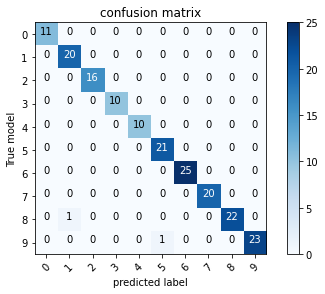

In [17]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title='confusion matrix')

In [18]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score
# precision formula : Precision = True Positives / (True Positives + False Positives)
# recall formula : Recall = True Positives / (True Positives + False Negatives)
print("precision score : ", precision_score(y_test, y_pred,average = 'micro', zero_division = "warn"))
print("recall score : ", recall_score(y_test, y_pred, average = 'micro', zero_division = "warn"))
print("f1 score :", f1_score(y_test, y_pred, average = 'micro', zero_division = "warn"))

precision score :  0.9888888888888889
recall score :  0.9888888888888889
f1 score : 0.9888888888888889


### <span style='background:yellow'>f1-score:This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. </span>
### <span style='background:yellow'>Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial </span>
### <span style='background:yellow'>Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case. </span>

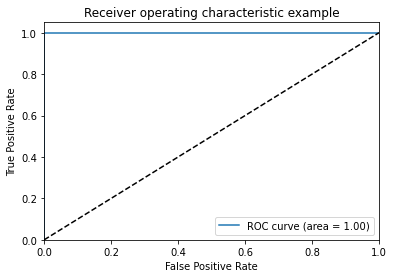

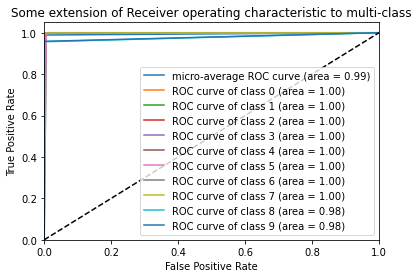

In [19]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

n_classes = 10
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [20]:
## Precision recall curve

In [21]:
from sklearn.metrics import precision_recall_curve


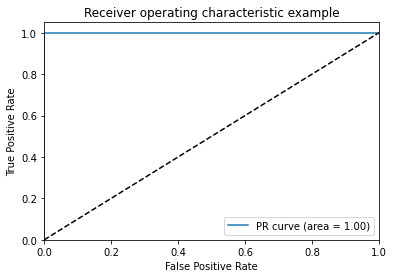

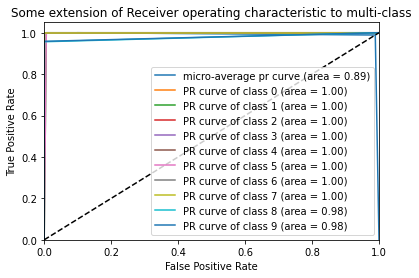

In [22]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='PR curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average pr curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='PR curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### We use pickle here to save our model  

In [23]:
import pickle
with open("svm_model.pkl", 'wb') as fid:
    pickle.dump(best_model, fid) 

In [24]:
############## TESTING THE MODEL ****************

### To test the model we need to transform the image we read to gray scale and resize it to match the size of images we trained the model on (8,8), to do that we we'll use the opencv library

In [25]:
#resizing image
import cv2
 
src = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)

# dsize


In [26]:
size = (8, 8)

# resize image
test_img = cv2.resize(src, size)

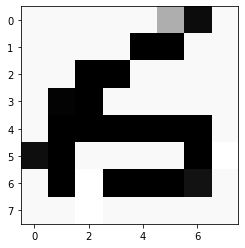

In [27]:
test_img = test_img / test_img.max()

plt.imshow(test_img,cmap="gray")
plt.show()

In [28]:
#test_img = 1-test_img


In [29]:
#test_img = test_img.reshape(-1,64)[0]
test_img = test_img.reshape(1,-1)
test_img
res = best_model.predict([test_img[0]])[0]


In [30]:
print("the model predicted digit is :{}".format(res))


the model predicted digit is :1


### We notice that whenever we test our model in images other than digit dataset images , the model would usaualy give us bad results